In [4]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')


Algorithmic complexity
====

Data structures, as the name implies, are abstract structures for storing data. You are already familiar wiht several - e..g. list and dict. Algorithms are esssntially *recipes* for manipulating data structures. As we get into more computationally intensive calculations, we need to better understand how the performacne of data structures and algorithms is measured so that we can choose the appropriate strategy. 

## Profling and benchmarking

We can measure performance in terms of the time taken as well as in terms of the number of basic operations performed. Measuring the time taken is known as profiling or benchmarking, and in the IPython notebook can be done conveniently with matic functions.

In [1]:
# Use %timeit to measure function calls
def f():
    import time
    time.sleep(2)

%timeit -n1 f()

1 loops, best of 3: 2 s per loop


In [2]:
# Use %%time to measure evaluation cell the Unix way
%%time

f()

CPU times: user 522 µs, sys: 940 µs, total: 1.46 ms
Wall time: 2 s


## Measuring algorithmic complexity

However, profiling doesn't tell us much about how the algorithm will perform on a different computer since it is partly determined by the hardware available.  To compare performance in a device-indpendent fashion, we use what is known as Big O notation (you may or may not have encountered this before in your Calculus courses). The Big O formalism characterizes functions in terms of their rates of growth. 

A little more formally, we have a comparison function $g(n)$ and another function $f(n)$ that returns the number of "elementary operations" we need to perform in our algorithm given an input of size $n$. In the example, the elementary oepration is comparison of two items. In statisitcal algorithms, this is most commonly a floating point operation (FLOP), such as addition or multiplicaiton of two floats. Now if the ratio $|f(n)/g(n)|$ can be bounded by a finite number $M$ as $n$ grows to infinity, we say that $f(n)$ has complexity of order $g(n)$. For example, if $f(n) = 10n^2$ and $g(n) = n$, then there is no such number $M$ and $f(n)$ is **not** $\mathcal{O}(n)$, but if $g(n) = n^2$, then $M = 10$ wil do and we say that $f(n)$ is $\mathcal{O}(n^2)$. So our search function is $\mathcal{O}(n)$. Formally, it is also $\mathcal{O} (n^2)$ and so on, but we always choose the "smallest" function $g$. We also drop all terms ohter than the larget - so we don't say $\mathcal{O}(n^3 + n^2 + n)$ but simply $\mathcal{O}(n^3)$. 

Note that since the constant is not used in big O notation, two algorithms can have the same big O complexity and have very different performance! However, the O notation is very helpful for understanding the *scalability* of our algorithm. Below we show a comparison of an $\mathcal{O}(n^2)$ algorithm (e.g. bubble sort) with an $\mathcal{O}(n \log{n})$ algorithm (e.g. merge sort). Regardless of the difference in constant factor, there is no competition as $n$ gets large.

Suppsoe you wanted to search for an item in an unsorted list of length $n$. One way to do this would be to scan from the first position sequentially until you find it (or not). If the item is in the list, you will need to scan ($n/2$) items on average to find it. If it is not in the list, you will need to scan all $n$ items. In any case, the complexity of the search grows linearly with the lenght of the list $n$. We say that the algorithmic complexity of the search using a linear scan is $\mathcal{O}(n)$.

Strictly, we should say the *average* complexity is $\mathcal{O}(n)$. We can also calculate worst case performance (when the item is not in the list), which is the same class $\mathcal{O}(n)$ as average complexity for this searching example. Since worst case performance may require a perverse organizaiotn of the input (e.g. asking a sort function to sort an already sorted list), randomizaiton of inputs will sometimes suffice to convert it to the average case.

Question: What is the algorithmic complexity of textbook matrix multiplication? Why?

### Comparing complexity of $\mathcal{O}(n^2)$ (e.g. bubble sort) and $\mathcal{O} (n \log n)$ (e.g. merge sort).

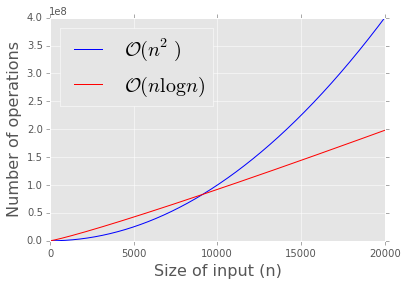

In [27]:
def f1(n, k):
    return k*n*n

def f2(n, k):
    return k*n*np.log(n)

n = np.arange(0, 20001)

plt.plot(n, f1(n, 1), c='blue')
plt.plot(n, f2(n, 1000), c='red')
plt.xlabel('Size of input (n)', fontsize=16)
plt.ylabel('Number of operations', fontsize=16)
plt.legend(['$\mathcal{O}(n^2)$', '$\mathcal{O}(n \log n)$'], loc='best', fontsize=20);

### Ranking of common Big O complexity classes

- consstant = $\mathcal{O}(1)$
- logarithmic = $\mathcal{O}(\log n)$
- linear = $\mathcal{O}(n)$
- n log n = $\mathcal{O}(n \log n)$
- quadratic = $\mathcal{O}(n^2)$
- cubic = $\mathcal{O}(n^3)$
- polynomial = $\mathcal{O}(n^k)$
- exponential = $\mathcal{O}(k^n)$
- factorial =$\mathcal{O}(n!)$


In [37]:
from IPython.display import Image

In [40]:
Image(url='http://bigocheatsheet.com/img/big-o-complexity.png')

### Complexity of common operations on Python data structures

See [here](https://wiki.python.org/moin/TimeComplexity) for the complexity of operations on standard Python data structures. Note for instance that searching a list is much more expensive than searching a dicitonary.

In [36]:
# Searching a list is O(n)

alist = range(1000000)
r = np.random.randint(100000)
%timeit -n3 r in alist

3 loops, best of 3: 1.28 ms per loop


In [35]:
# Searching a dictionary is O(1)

adict = dict.fromkeys(alist)
%timeit -n3 r in adict

3 loops, best of 3: 318 ns per loop


Space complexity
----

We can aslo use big O notnation in the same way to measure the space complexity of an algorithm. The basic idea is identical. The notion of space complexity becomes important when you data volume is  of the same magntude orlarger than the memory you have available. In that case, an algorihtm with high space complexity may end up having to swap memory constantly, and will perform far worse than its Big O for time complexity would suggest.

Sometimes, you can trade space complexity for time complexity - caching and dynamic programming are obvious examples.

### How much space do I need?

Just as you should have a good idea of how your algorithm will scale with increasing $n$, you should also be able to know how much memroy your data structures will require. For example, if you had an $n \times p$ matrix of integers, an $n \times p$ matrix of flaots, and an $n \times p$ matrix of complex floats, how large can $n$ and $p$ be before you run out of RAM to store them? 


In [81]:
# Notice how much overhead Python objects have
# A raw integer should be 64 bits or 8 bytes only

print sys.getsizeof(1)
print sys.getsizeof(1234567890123456789012345678901234567890)
print sys.getsizeof(3.14)
print sys.getsizeof(3j)
print sys.getsizeof('a')
print sys.getsizeof('hello world')

24
44
24
32
38
48


In [72]:
print np.ones((100,100), dtype='byte').nbytes
print np.ones((100,100), dtype='i2').nbytes
print np.ones((100,100), dtype='int').nbytes # default is 64 bits or 8 bytes
print np.ones((100,100), dtype='f4').nbytes
print np.ones((100,100), dtype='float').nbytes # default is 64 bits or 8 bytes
print np.ones((100,100), dtype='complex').nbytes

10000
20000
80000
40000
80000
160000
